In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
#import xgboost as xgb
#from mlxtend.regressor import StackingCVRegressor
#from sklearn.model_selection import cross_val_predict

In [2]:
# Plot Setting
sns.set_context ('notebook') 
sns.set_style ('ticks')  
tableau10 = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F','#EDC949','#AF7AA1','#FF9DA7'
             ,'#9C755F','#BAB0AB']
sns.set_palette
(tableau10) 
%matplotlib inline
plt.rcParams ['figure.figsize']=[9,6]

In [3]:
train = pd.read_csv('train.csv',encoding = 'ISO-8859-1')
test = pd.read_csv ('test.csv',index_col=0, encoding = 'ISO-8859-1')

In [4]:
pd.set_option('max_column',20)
pd.set_option('display.float_format', lambda x: '%.2f'%x)
train.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Private room + garden 2mins walk to everywhere.,"2 rooms new apartment, your stay with private ...","2 bedroom apartment, you got one of the room a...","2 rooms new apartment, your stay with private ...",none,NaN,NaN,NaN,NaN,NaN,...,f,moderate,f,f,7,5,2,0,nan,$58.00
1,"On the Beachfront, next to cafes and restaurants.",Beachfront balcony and next to cafes and resta...,"Happy to accommodate your requests, as best we...",Beachfront balcony and next to cafes and resta...,none,"Comfortable, relaxed, beachy with ample cafes ...",NaN,The bus stop is within 50m of the front door. ...,NaN,NaN,...,f,strict_14_with_grace_period,f,f,2,1,1,0,0.15,$125.00
2,Room in Camperdown,"Excellent location! Close to superb bars, cafe...",NaN,"Excellent location! Close to superb bars, cafe...",none,NaN,NaN,NaN,NaN,NaN,...,f,flexible,f,f,1,0,1,0,nan,$99.00
3,Beautiful room in summer hill,"A Typical inner west sydney share house, you w...","Living room, out back balcony, kitchen, bathro...","A Typical inner west sydney share house, you w...",none,"Summer hill, is a gorgeous and quiet inner we...","Make yourself at home, enjoy a typical inner w...","Train is 5 minutes walking distance from house,",NaN,"I will be away in Europe, so wonât be able t...",...,f,strict_14_with_grace_period,f,f,1,0,1,0,nan,$99.00
4,2 Bedroom Apartment in Kensington.,2 Bedroom Loft Apartment in a small complex. W...,NaN,2 Bedroom Loft Apartment in a small complex. W...,none,NaN,NaN,NaN,NaN,NaN,...,f,flexible,f,f,1,1,0,0,0.05,$125.00


In [5]:
train.describe()

,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,9838.00,0.00,9838.00,9838.00,9838.00,9838.00,9838.00,9833.00,9835.00,9824.00,...,6884.00,6879.00,6882.00,6878.00,6876.00,9838.00,9838.00,9838.00,9838.00,7140.00
mean,72165226.20,nan,9.23,9.23,-33.86,151.21,3.60,1.37,1.65,2.10,...,9.28,9.74,9.75,9.73,9.33,7.54,6.81,0.68,0.05,1.11
std,72857679.33,nan,30.64,30.64,0.07,0.08,2.24,0.69,1.11,1.56,...,1.19,0.77,0.77,0.68,1.02,24.54,24.62,1.69,0.87,1.52
min,14093.00,nan,0.00,0.00,-34.09,150.60,1.00,0.00,0.00,0.00,...,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.01
25%,15193662.00,nan,1.00,1.00,-33.90,151.18,2.00,1.00,1.00,1.00,...,9.00,10.00,10.00,10.00,9.00,1.00,0.00,0.00,0.00,0.13
50%,43709410.00,nan,1.00,1.00,-33.88,151.22,3.00,1.00,1.00,2.00,...,10.00,10.00,10.00,10.00,10.00,1.00,1.00,0.00,0.00,0.44
75%,113501034.25,nan,3.00,3.00,-33.83,151.26,4.00,2.00,2.00,3.00,...,10.00,10.00,10.00,10.00,10.00,2.00,1.00,1.00,0.00,1.51
max,274656485.00,nan,279.00,279.00,-33.39,151.34,16.00,11.00,19.00,29.00,...,10.00,10.00,10.00,10.00,10.00,197.00,197.00,21.00,26.00,13.49


In [6]:
pd.set_option('max_column',20)
pd.set_option('display.float_format', lambda x: '%.2f'%x)
test.head()

,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
0,Spacious 1 bed apt with big balcony in waterloo,spacious one bed apartment with a big balcony ...,There is a east village wilson parking availab...,spacious one bed apartment with a big balcony ...,none,Close to east village shoppibg center 200m away,Wifi will be avalible at the end of Sepnationa...,2 mins walking distance to east village shoppi...,We have a public small garden on level5âº,(Phone number hidden by Airbnb) We are help to...,...,t,f,strict_14_with_grace_period,f,f,3,3,0,0,5.07
1,"Location, Location, moments to Bondi Beach",World famous Bondi Beach at your doorstep. Th...,Our place was a hotel in its previous life. I...,World famous Bondi Beach at your doorstep. Th...,none,Oh my lord ... its Bondi Beach - the area is a...,"This property is in the heart of Bondi Beach, ...","There is good public transport with buses, and...",The entire room/unit is yours and you are not ...,I am available to help with questions or issue...,...,t,f,flexible,f,f,2,2,0,0,1.99
2,Cosy room in a brand new design apartment.,"Cosy 2 bedroom apartment , inside a brand new ...","Private bedroom,and private bathroom. Communna...","Cosy 2 bedroom apartment , inside a brand new ...",none,"Waterloo is a vibrant new growing area ,locate...",NaN,NaN,NaN,"Will be there once a while,mostly working,but ...",...,t,f,strict_14_with_grace_period,f,f,1,0,1,0,1.73
3,Tranquility in Sydney 2,This is a second bedroom in Tranquility in Syd...,The room is located on the first level and aff...,This is a second bedroom in Tranquility in Syd...,none,As in main listing for Tranquility in Sydney CBD,As in main listing for Tranquility in Sydney CBD,"Public, private transport, taxi, walking the area","Access to ground floor - kitchen, lounge, din...",Available to assist with queries or help.,...,f,f,flexible,f,f,2,0,2,0,0.10
4,Tree House Apartment (2 - 4 pers),This apartment is tucked away in the trees.. T...,Recently refurbished 2 bedroom apartment with ...,This apartment is tucked away in the trees.. T...,none,The local area is a great place to unwind and ...,The property is accessed by stairs so guests s...,Having a car is very helpful while staying her...,Access to the Apartment is via private deck ov...,Guests have complete privacy however we are av...,...,f,f,moderate,f,f,2,2,0,0,0.21


In [7]:
test.describe()

,host_id,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,22957.00,0.00,22957.00,22957.00,22957.00,22957.00,22957.00,22950.00,22952.00,22941.00,...,16198.00,16169.00,16194.00,16171.00,16169.00,22957.00,22957.00,22957.00,22957.00,16868.00
mean,72482348.25,nan,9.66,9.66,-33.86,151.21,3.60,1.37,1.65,2.09,...,9.28,9.74,9.75,9.72,9.35,7.84,7.13,0.66,0.05,1.10
std,73885483.30,nan,33.12,33.12,0.07,0.08,2.24,0.72,1.14,1.53,...,1.17,0.77,0.78,0.71,1.00,25.87,25.95,1.63,0.89,1.50
min,12894.00,nan,0.00,0.00,-34.14,150.61,1.00,0.00,0.00,0.00,...,2.00,2.00,2.00,2.00,2.00,1.00,0.00,0.00,0.00,0.01
25%,15118978.00,nan,1.00,1.00,-33.90,151.18,2.00,1.00,1.00,1.00,...,9.00,10.00,10.00,10.00,9.00,1.00,0.00,0.00,0.00,0.14
50%,42301934.00,nan,1.00,1.00,-33.88,151.22,3.00,1.00,1.00,2.00,...,10.00,10.00,10.00,10.00,10.00,1.00,1.00,0.00,0.00,0.44
75%,112832954.00,nan,3.00,3.00,-33.83,151.26,4.00,2.00,2.00,3.00,...,10.00,10.00,10.00,10.00,10.00,2.00,1.00,1.00,0.00,1.49
max,274727754.00,nan,438.00,438.00,-33.40,151.34,16.00,18.00,46.00,22.00,...,10.00,10.00,10.00,10.00,10.00,197.00,197.00,21.00,26.00,13.60


In [8]:
# each feature should have 9383 observations
# there are some features with missing value
# also, 40 object features need to transform 
train.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9838 entries, 0 to 9837
Columns: 83 entries, name to price
dtypes: float64(24), int64(19), object(40)
memory usage: 6.2+ MB


In [9]:
# each feature should have 9383 observations
# there are some features with missing value
# also, 40 object features need to transform 
test.info(verbose = False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22957 entries, 0 to 22956
Columns: 82 entries, name to reviews_per_month
dtypes: float64(24), int64(19), object(39)
memory usage: 14.5+ MB


## Reduce Dimensionality 

In [10]:
# Check missing value
pd.set_option('max_rows',5000)
pd.set_option('display.float_format', lambda x: '%.2f'%x)
train.isnull().sum()

name                                               0
summary                                            0
space                                           2654
description                                        0
experiences_offered                                0
neighborhood_overview                           3438
notes                                           5538
transit                                         3369
access                                          3892
interaction                                     3878
house_rules                                     3987
host_id                                            0
host_since                                         0
host_location                                      8
host_about                                      4363
host_response_time                              4566
host_response_rate                              4566
host_acceptance_rate                            9838
host_is_superhost                             

In [11]:
# Remove empty columns and 
# Remove useless columns 'host_id' ,'zipcode'
# Remove repeating columns 'description', since it is coincide with 'summary'
train.drop(labels = ['host_acceptance_rate','square_feet','weekly_discount','monthly_discount','host_id','description','zipcode'],
           axis =1,inplace = True)

In [12]:
# Repeat same step as in test dataset
test.drop(labels = ['host_acceptance_rate','square_feet','weekly_discount','monthly_discount','host_id','description','zipcode'],
           axis =1,inplace = True)

In [13]:
# check columns with the number of unique values 
# and remove the columns if and only if have singular value filled in 
train.loc[:, train.apply(lambda x: x.nunique()) <=1].head()

,experiences_offered,requires_license,is_business_travel_ready
0,none,f,f
1,none,f,f
2,none,f,f
3,none,f,f
4,none,f,f


In [14]:
# Drop features with singular unique values
train.drop(labels = ['experiences_offered','requires_license',
                    'is_business_travel_ready'], axis = 1, inplace = True)

In [15]:
# Repeat same step as in test dataset
test.drop(labels = ['experiences_offered','requires_license',
                    'is_business_travel_ready'], axis = 1, inplace = True)

In [16]:
# total dropped 8 useless features
train.shape

(9838, 73)

In [17]:
test.shape

(22957, 72)

## Fill in Missing Value

In [18]:
train.isnull().sum()

name                                               0
summary                                            0
space                                           2654
neighborhood_overview                           3438
notes                                           5538
transit                                         3369
access                                          3892
interaction                                     3878
house_rules                                     3987
host_since                                         0
host_location                                      8
host_about                                      4363
host_response_time                              4566
host_response_rate                              4566
host_is_superhost                                  0
host_neighbourhood                              2915
host_listings_count                                0
host_total_listings_count                          0
host_verifications                            

In [19]:
Features = train.columns[train.isna().any()].tolist()
Features

['space',
 'neighborhood_overview',
 'notes',
 'transit',
 'access',
 'interaction',
 'house_rules',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_neighbourhood',
 'neighbourhood',
 'city',
 'bathrooms',
 'bedrooms',
 'beds',
 'security_deposit_perc',
 'cleaning_fee_perc',
 'first_review',
 'last_review',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'cancellation_policy',
 'reviews_per_month']

In [20]:
# Identify Boolean Variance 
# Convert it into integers as 1 or 0 (One-Hot Encoding can be used here as well)
train.loc[:, train.apply(lambda x: x.nunique()) <=2].head()

,host_is_superhost,host_identity_verified,is_location_exact,instant_bookable,require_guest_profile_picture,require_guest_phone_verification
0,f,t,f,f,f,f
1,f,t,t,f,f,f
2,f,f,t,f,f,f
3,f,t,t,f,f,f
4,f,f,t,t,f,f


In [21]:
# Convert Boolean Variable into 0 or 1
Boolean_Variable=['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable'
                 ,'require_guest_profile_picture','require_guest_phone_verification']
for feature in Boolean_Variable:
    train[feature]= train[feature].apply(lambda x: 1 if x=='t' else 0)

In [22]:
# Test Set 
Boolean_Variable=['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable'
                 ,'require_guest_profile_picture','require_guest_phone_verification']
for feature in Boolean_Variable:
    test[feature]= test[feature].apply(lambda x: 1 if x=='t' else 0)

In [23]:
pd.set_option('Max_row',5)
pd.set_option('Max_columns',85)
pd.set_option('display.float_format', lambda x: '%.2f'%x)
train.head()

,name,summary,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Private room + garden 2mins walk to everywhere.,"2 rooms new apartment, your stay with private ...","2 bedroom apartment, you got one of the room a...",NaN,NaN,NaN,NaN,NaN,Keep quiet after 9pm No BBQ No party No extra ...,2015-06-14,"Cheltenham, New South Wales, Australia",NaN,within an hour,100%,0,NaN,9.00,9.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,"Beecroft, NSW, Australia",NaN,Hornsby,Beecroft,"Beecroft, Australia",-33.75,151.07,0,Apartment,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Smok...",259.00,69.00,1,52.00,2,1125,2,2,1125,1125,2.00,1125.00,13,21,51,326,0,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,0,moderate,0,0,7,5,2,0,nan,$58.00
1,"On the Beachfront, next to cafes and restaurants.",Beachfront balcony and next to cafes and resta...,"Happy to accommodate your requests, as best we...","Comfortable, relaxed, beachy with ample cafes ...",NaN,The bus stop is within 50m of the front door. ...,NaN,NaN,NaN,2016-02-29,"New South Wales, Australia",Living a relaxed lifestyle on the beach. Mini...,within a day,100%,0,NaN,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,"Dee Why, NSW, Australia",NaN,Warringah,Dee Why,"Dee Why, Australia",-33.76,151.30,1,Apartment,Entire home/apt,3,1.00,1.00,2.00,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Family...",160.00,68.00,2,8.00,3,60,3,3,60,60,3.00,60.00,1,14,44,311,2,1,2018-05-27,2018-12-30,70.00,10.00,7.00,10.00,10.00,10.00,10.00,0,strict_14_with_grace_period,0,0,2,1,1,0,0.15,$125.00
2,Room in Camperdown,"Excellent location! Close to superb bars, cafe...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-09-19,AU,NaN,NaN,NaN,0,Camperdown,1.00,1.00,"['email', 'phone']",0,"Camperdown, NSW, Australia",Camperdown,Marrickville,Camperdown,"Camperdown, Australia",-33.89,151.18,1,House,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,Wifi,Kitchen,Washer,Essentials}",nan,nan,1,0.00,1,1125,1,1,1125,1125,1.00,1125.00,0,0,0,0,0,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,0,flexible,0,0,1,0,1,0,nan,$99.00
3,Beautiful room in summer hill,"A Typical inner west sydney share house, you w...","Living room, out back balcony, kitchen, bathro...","Summer hill, is a gorgeous and quiet inner we...","Make yourself at home, enjoy a typical inner w...","Train is 5 minutes walking distance from house,",NaN,"I will be away in Europe, so wonât be able t...",NaN,2015-01-11,"Sydney, New South Wales, Australia","My name is Jennifer, i am a 26 year old female...",NaN,NaN,0,Summer Hill,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,"Summer Hill, NSW, Australia",Summer Hill,Ashfield,Summer Hill,"Summer Hill, Australia",-33.90,151.14,1,House,Private room,2,1.00,1.00,1.00,Real Bed,"{W

In [24]:
# Fill text feature NaN with 'none'
fillna_none = ['space','neighborhood_overview','notes','transit','access','interaction','house_rules'
              ,'host_about','neighbourhood']
train[fillna_none]= train[fillna_none].fillna('none')

In [25]:
# Test Set
fillna_none = ['space','neighborhood_overview','notes','transit','access','interaction','house_rules'
              ,'host_about','neighbourhood']
test[fillna_none]= test[fillna_none].fillna('none')

In [26]:
# Fill host_response_rate with percentage
train['host_response_rate']= train['host_response_rate'].fillna('0%')

In [27]:
# Test Set
test['host_response_rate']= test['host_response_rate'].fillna('0%')

In [28]:
pd.set_option('Max_row',5)
pd.set_option('Max_columns',85)
pd.set_option('display.float_format', lambda x: '%.2f'%x)
train.head()

,name,summary,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Private room + garden 2mins walk to everywhere.,"2 rooms new apartment, your stay with private ...","2 bedroom apartment, you got one of the room a...",none,none,none,none,none,Keep quiet after 9pm No BBQ No party No extra ...,2015-06-14,"Cheltenham, New South Wales, Australia",none,within an hour,100%,0,NaN,9.00,9.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,"Beecroft, NSW, Australia",none,Hornsby,Beecroft,"Beecroft, Australia",-33.75,151.07,0,Apartment,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Smok...",259.00,69.00,1,52.00,2,1125,2,2,1125,1125,2.00,1125.00,13,21,51,326,0,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,0,moderate,0,0,7,5,2,0,nan,$58.00
1,"On the Beachfront, next to cafes and restaurants.",Beachfront balcony and next to cafes and resta...,"Happy to accommodate your requests, as best we...","Comfortable, relaxed, beachy with ample cafes ...",none,The bus stop is within 50m of the front door. ...,none,none,none,2016-02-29,"New South Wales, Australia",Living a relaxed lifestyle on the beach. Mini...,within a day,100%,0,NaN,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,"Dee Why, NSW, Australia",none,Warringah,Dee Why,"Dee Why, Australia",-33.76,151.30,1,Apartment,Entire home/apt,3,1.00,1.00,2.00,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Family...",160.00,68.00,2,8.00,3,60,3,3,60,60,3.00,60.00,1,14,44,311,2,1,2018-05-27,2018-12-30,70.00,10.00,7.00,10.00,10.00,10.00,10.00,0,strict_14_with_grace_period,0,0,2,1,1,0,0.15,$125.00
2,Room in Camperdown,"Excellent location! Close to superb bars, cafe...",none,none,none,none,none,none,none,2013-09-19,AU,none,NaN,0%,0,Camperdown,1.00,1.00,"['email', 'phone']",0,"Camperdown, NSW, Australia",Camperdown,Marrickville,Camperdown,"Camperdown, Australia",-33.89,151.18,1,House,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,Wifi,Kitchen,Washer,Essentials}",nan,nan,1,0.00,1,1125,1,1,1125,1125,1.00,1125.00,0,0,0,0,0,0,NaN,NaN,nan,nan,nan,nan,nan,nan,nan,0,flexible,0,0,1,0,1,0,nan,$99.00
3,Beautiful room in summer hill,"A Typical inner west sydney share house, you w...","Living room, out back balcony, kitchen, bathro...","Summer hill, is a gorgeous and quiet inner we...","Make yourself at home, enjoy a typical inner w...","Train is 5 minutes walking distance from house,",none,"I will be away in Europe, so wonât be able t...",none,2015-01-11,"Sydney, New South Wales, Australia","My name is Jennifer, i am a 26 year old female...",NaN,0%,0,Summer Hill,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,"Summer Hill, NSW, Australia",Summer Hill,Ashfield,Summer Hill,"Summer Hill, Australia",-33.90,151.14,1,House,Private room,2,1.00,1.

In [29]:
# Fill numerical variables with mean

Numerical_Variables = ['security_deposit_perc','cleaning_fee_perc','review_scores_rating',
                      'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
                      ,'review_scores_communication','review_scores_location','review_scores_value',
                      'reviews_per_month','bathrooms','bedrooms','beds']
for features in Numerical_Variables:
    train[features]=train[features].fillna(train[features].mean())

In [30]:
# Test Set

Numerical_Variables = ['security_deposit_perc','cleaning_fee_perc','review_scores_rating',
                      'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
                      ,'review_scores_communication','review_scores_location','review_scores_value',
                      'reviews_per_month','bathrooms','bedrooms','beds']
for features in Numerical_Variables:
    test[features]=test[features].fillna(test[features].mean())

In [31]:
# Fill Category variables with mode
Category_Variables = ['cancellation_policy','city','host_location','host_response_time','host_neighbourhood']

for features in Category_Variables:
    train[features]=train[features].fillna(train[features].mode()[0])


In [32]:
# Fill Category variables with mode
Category_Variables = ['cancellation_policy','city','host_location','host_response_time','host_neighbourhood']

for features in Category_Variables:
    test[features]=test[features].fillna(test[features].mode()[0])

In [33]:
pd.set_option('Max_row',5)
pd.set_option('Max_columns',85)
pd.set_option('display.float_format', lambda x: '%.2f'%x)
train.head()

,name,summary,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price
0,Private room + garden 2mins walk to everywhere.,"2 rooms new apartment, your stay with private ...","2 bedroom apartment, you got one of the room a...",none,none,none,none,none,Keep quiet after 9pm No BBQ No party No extra ...,2015-06-14,"Cheltenham, New South Wales, Australia",none,within an hour,100%,0,Bondi Beach,9.00,9.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,"Beecroft, NSW, Australia",none,Hornsby,Beecroft,"Beecroft, Australia",-33.75,151.07,0,Apartment,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Smok...",259.00,69.00,1,52.00,2,1125,2,2,1125,1125,2.00,1125.00,13,21,51,326,0,0,NaN,NaN,93.64,9.58,9.28,9.74,9.75,9.73,9.33,0,moderate,0,0,7,5,2,0,1.11,$58.00
1,"On the Beachfront, next to cafes and restaurants.",Beachfront balcony and next to cafes and resta...,"Happy to accommodate your requests, as best we...","Comfortable, relaxed, beachy with ample cafes ...",none,The bus stop is within 50m of the front door. ...,none,none,none,2016-02-29,"New South Wales, Australia",Living a relaxed lifestyle on the beach. Mini...,within a day,100%,0,Bondi Beach,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,"Dee Why, NSW, Australia",none,Warringah,Dee Why,"Dee Why, Australia",-33.76,151.30,1,Apartment,Entire home/apt,3,1.00,1.00,2.00,Real Bed,"{TV,Wifi,Kitchen,""Free street parking"",""Family...",160.00,68.00,2,8.00,3,60,3,3,60,60,3.00,60.00,1,14,44,311,2,1,2018-05-27,2018-12-30,70.00,10.00,7.00,10.00,10.00,10.00,10.00,0,strict_14_with_grace_period,0,0,2,1,1,0,0.15,$125.00
2,Room in Camperdown,"Excellent location! Close to superb bars, cafe...",none,none,none,none,none,none,none,2013-09-19,AU,none,within an hour,0%,0,Camperdown,1.00,1.00,"['email', 'phone']",0,"Camperdown, NSW, Australia",Camperdown,Marrickville,Camperdown,"Camperdown, Australia",-33.89,151.18,1,House,Private room,2,1.00,1.00,1.00,Real Bed,"{TV,Internet,Wifi,Kitchen,Washer,Essentials}",228.11,50.86,1,0.00,1,1125,1,1,1125,1125,1.00,1125.00,0,0,0,0,0,0,NaN,NaN,93.64,9.58,9.28,9.74,9.75,9.73,9.33,0,flexible,0,0,1,0,1,0,1.11,$99.00
3,Beautiful room in summer hill,"A Typical inner west sydney share house, you w...","Living room, out back balcony, kitchen, bathro...","Summer hill, is a gorgeous and quiet inner we...","Make yourself at home, enjoy a typical inner w...","Train is 5 minutes walking distance from house,",none,"I will be away in Europe, so wonât be able t...",none,2015-01-11,"Sydney, New South Wales, Australia","My name is Jennifer, i am a 26 year old female...",within an hour,0%,0,Summer Hill,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,"Summer Hill, NSW, Australia",Summer Hill,Ashfield,Summer Hill,"Summer 

In [34]:
# Fill in review date
train['last_review']=pd.to_datetime(train['last_review']) 
train['first_review']=pd.to_datetime(train['first_review']) 
train['review_interval'] = (train['last_review']-train['first_review'])
# Convert review interval into how many days
train['review_interval']= train['review_interval'].dt.days
# Fill in review days with mean 
train['review_interval']= train['review_interval'].fillna(train['review_interval'].mean())
# Remove 'last_review' and 'first_review'
train = train.drop(['first_review','last_review'], axis=1)

In [35]:
# Test Set 
test['last_review']=pd.to_datetime(test['last_review']) 
test['first_review']=pd.to_datetime(test['first_review']) 
test['review_interval'] = (test['last_review']-test['first_review'])
# Convert review interval into how many days
test['review_interval']= test['review_interval'].dt.days
# Fill in review days with mean 
test['review_interval']= test['review_interval'].fillna(test['review_interval'].mean())
# Remove 'last_review' and 'first_review'
test = test.drop(['first_review','last_review'], axis=1)

In [36]:
# Same way to fill 'host_since' feature
# Find how long the host has been active on airbnb
train['host_since']=pd.to_datetime(train['host_since']) 
Max = train['host_since'].max()
train['host_since'] = train['host_since'].apply(lambda x: Max - x).dt.days

In [37]:
# Test Set
test['host_since']=pd.to_datetime(test['host_since']) 
Max = test['host_since'].max()
test['host_since'] = test['host_since'].apply(lambda x: Max - x).dt.days

In [38]:
pd.set_option('Max_row',200)
pd.set_option('Max_columns',85)
pd.set_option('display.float_format', lambda x: '%.2f'%x)

train.isnull().sum()

name                                            0
summary                                         0
space                                           0
neighborhood_overview                           0
notes                                           0
transit                                         0
access                                          0
interaction                                     0
house_rules                                     0
host_since                                      0
host_location                                   0
host_about                                      0
host_response_time                              0
host_response_rate                              0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_verifications                              0
host_identity_verified                          0


# Featuring Engineering 

In [39]:
# Convert 'price' into readable numerical number
train1 = train.copy()
test1 = test.copy()
train1['price'] = train1['price'].apply(lambda x: float(x.split('$')[1].replace(',','')))

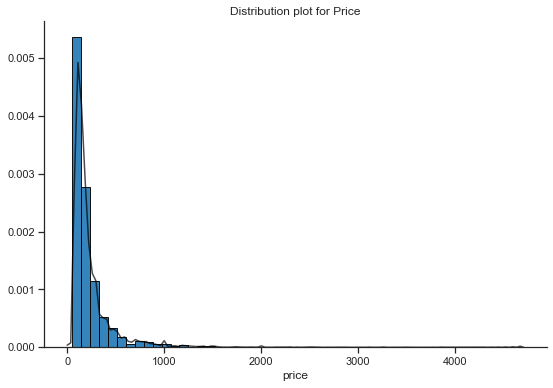

In [40]:
# Y dists plot
from statlearning import plot_dist
y=train1['price']
fig, ax = plot_dist (train1['price'])
ax.set_title ('Distribution plot for Price')
plt.show()

In [41]:
# host_response_rate
train1['host_response_rate']= train1.loc[:,'host_response_rate'].str.rstrip('%')
test1['host_response_rate']= test1.loc[:,'host_response_rate'].str.rstrip('%')

##### Ordinal Variable 

In [42]:
# see how many uniques in these ordinal variable

print(train1['host_response_time'].value_counts())

print('**************$%%^Y&^*%^&^$%^$^&$&$&$&*')

print(train1['cancellation_policy'].value_counts())

within an hour        8077
within a few hours     868
within a day           725
a few days or more     168
Name: host_response_time, dtype: int64
**************$%%^Y&^*%^&^$%^$^&$&$&$&*
strict_14_with_grace_period    4235
flexible                       3275
moderate                       2277
super_strict_60                  29
super_strict_30                  20
luxury_moderate                   1
luxury_super_strict_125           1
Name: cancellation_policy, dtype: int64


In [43]:
# convert ordinal variable into numbers to intutive visualise relationship

ordinal_variable = ['host_response_time', 'cancellation_policy']

train1[ordinal_variable] = train1[ordinal_variable].replace({'within an hour':'5', 'within a few hours':'4',
'within a day':'3','a few days or more':'2','no response':'1','strict_14_with_grace_period':'5',
'flexible':'4','moderate':'3', 'super_strict_60':'2', 'super_strict_30':'1','luxury_super_strict_125':'0'
,'luxury_moderate':'0'})

In [44]:
test1[ordinal_variable] = test1[ordinal_variable].replace({'within an hour':'5', 'within a few hours':'4',
'within a day':'3','a few days or more':'2','no response':'1','strict_14_with_grace_period':'5',
'flexible':'4','moderate':'3', 'super_strict_60':'2', 'super_strict_30':'1','luxury_super_strict_125':'0'
,'luxury_moderate':'0', 'luxury_no_refund': '0'})

In [45]:
display(train1[ordinal_variable].T)
display(test1[ordinal_variable].T)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,9796,9797,9798,9799,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,9810,9811,9812,9813,9814,9815,9816,9817,9818,9819,9820,9821,9822,9823,9824,9825,9826,9827,9828,9829,9830,9831,9832,9833,9834,9835,9836,9837
host_response_time,5,3,5,5,5,5,5,3,4,5,3,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,3,5,3,4,5,5,5,3,3,3,5,5,5,4,5,5,...,5,3,5,5,3,4,4,4,5,5,4,5,3,5,5,3,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
cancellation_policy,3,5,4,5,4,5,4,5,3,3,5,5,5,4,3,4,3,4,5,5,5,3,4,5,5,3,4,5,5,4,4,5,5,4,4,5,5,5,5,5,5,4,...,4,4,4,5,3,4,5,5,3,4,4,5,3,5,3,5,4,3,3,4,5,5,3,5,5,4,5,5,5,3,4,2,3,3,5,5,4,5,3,5,3,5


id,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,22915,22916,22917,22918,22919,22920,22921,22922,22923,22924,22925,22926,22927,22928,22929,22930,22931,22932,22933,22934,22935,22936,22937,22938,22939,22940,22941,22942,22943,22944,22945,22946,22947,22948,22949,22950,22951,22952,22953,22954,22955,22956
host_response_time,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,3,5,5,5,5,5,5,3,5,5,5,5,5,3,5,2,5,3,5,5,5,...,5,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,5,5,5,5,5,5,5,5,5,5,5,5,3,5,3,5,5
cancellation_policy,5,4,5,4,3,5,5,3,3,5,3,4,5,3,5,4,4,3,5,5,5,5,4,3,5,3,4,5,3,3,3,5,4,4,5,5,4,4,4,5,3,5,...,4,5,4,3,3,5,5,4,4,4,5,4,5,5,3,4,3,3,3,5,5,3,4,1,5,4,3,5,5,5,5,5,4,3,4,3,5,4,3,4,5,3


#### Nominal Variable

In [46]:
# Observe how many uniques in the nominal variable 

print(train1['property_type'].value_counts())

print('*****************&*^*%^&&%^&&$%#$#$#^%^&')

print(train1['room_type'].value_counts())

print('****************^%%&%^&^&*^&*^&%^&%^&')

print(train1['bed_type'].value_counts())

print('****************^%%&%^&^&*^&*^&%^&%^&')

# since 'host_location','neighbourhood', 'host_neighbourhood', 'street', 'city', 'smart_location' has 
# interelationship, thus only select one typical variable 'neighbourhood' to represent suburb

print(train1['neighbourhood'].value_counts())


Apartment             5993
House                 2488
Townhouse              421
Condominium            180
Guest suite            153
Guesthouse             109
Serviced apartment      74
Loft                    62
Villa                   60
Bed and breakfast       54
Bungalow                51
Boutique hotel          46
Cottage                 30
Other                   25
Hostel                  23
Cabin                   15
Tiny house              14
Boat                     9
Hotel                    8
Tent                     6
Farm stay                5
Aparthotel               4
Camper/RV                3
Barn                     1
Island                   1
Yurt                     1
Cave                     1
Dome house               1
Name: property_type, dtype: int64
*****************&*^*%^&&%^&&$%#$#$#^%^&
Entire home/apt    6801
Private room       2986
Shared room          51
Name: room_type, dtype: int64
****************^%%&%^&^&*^&*^&%^&%^&
Real Bed         9792
Pull-ou

In [47]:
# since some variable has few observations, 
# therefore, I merged into other columns

counts = train1['property_type'].value_counts()
for level in counts.index:
    if counts[level] < 2000:
        train1.loc[train1['property_type']==level,'property_type'] = 'other'


counts = train1['room_type'].value_counts()
for level in counts.index:
    if counts[level] < 2000:
        train1.loc[train1['room_type']==level,'room_type'] = 'other'


counts = train1['bed_type'].value_counts()
for level in counts.index:
    if counts[level] < 9000:
        train1.loc[train1['bed_type']==level,'bed_type'] = 'other'
        
        
counts = train1['neighbourhood'].value_counts()
for level in counts.index:
    if counts[level] < 200:
        train1.loc[train1['neighbourhood']==level,'neighbourhood'] = 'other'


In [48]:

print(test1['property_type'].value_counts())

print('*****************&*^*%^&&%^&&$%#$#$#^%^&')

print(test1['room_type'].value_counts())

print('****************^%%&%^&^&*^&*^&%^&%^&')

print(test1['bed_type'].value_counts())

print('****************^%%&%^&^&*^&*^&%^&%^&')

# since 'host_location','neighbourhood', 'host_neighbourhood', 'street', 'city', 'smart_location' has 
# interelationship, thus only select one typical variable 'neighbourhood' to represent suburb

print(test1['neighbourhood'].value_counts())

Apartment                 13873
House                      5833
Townhouse                  1002
Condominium                 459
Guest suite                 338
Guesthouse                  269
Serviced apartment          191
Villa                       155
Loft                        152
Bungalow                    114
Boutique hotel              108
Cottage                     106
Bed and breakfast            98
Cabin                        57
Hostel                       42
Other                        40
Hotel                        30
Tiny house                   17
Boat                         16
Camper/RV                    14
Aparthotel                   11
Farm stay                     7
Chalet                        5
Tent                          4
Casa particular (Cuba)        3
Resort                        3
Island                        2
Yurt                          2
Barn                          1
Earth house                   1
Castle                        1
Treehous

In [49]:
# Repeat for test1 Set

counts = test1['property_type'].value_counts()
for level in counts.index:
    if counts[level] < 2000:
        test1.loc[test1['property_type']==level,'property_type'] = 'other'


counts = test1['room_type'].value_counts()
for level in counts.index:
    if counts[level] < 2000:
        test1.loc[test1['room_type']==level,'room_type'] = 'other'


counts = test1['bed_type'].value_counts()
for level in counts.index:
    if counts[level] < 9000:
        test1.loc[test1['bed_type']==level,'bed_type'] = 'other'

        
counts = test1['neighbourhood'].value_counts()
for level in counts.index:
    if counts[level] < 500:  # I change to < 500 to keep test1 is same dimensionality as train1
        test1.loc[test1['neighbourhood']==level,'neighbourhood'] = 'other'

In [50]:
# def 一个函数 去变化dummy variable

# One - Hot Encoding to train dataset 
def get_dummies(df, col_name):
    return pd.get_dummies(df[col_name], prefix = col_name, drop_first = True)

columns = ['property_type', 'room_type', 'bed_type','neighbourhood' ]
for col in columns:
    dummies_train1_df = get_dummies(train1, columns)
    print(dummies_train1_df.head(5))

   property_type_House  property_type_other  room_type_Private room  \
0                    0                    0                       1   
1                    0                    0                       0   
2                    1                    0                       1   
3                    1                    0                       1   
4                    0                    0                       0   

   room_type_other  bed_type_other  neighbourhood_Bondi Beach  \
0                0               0                          0   
1                0               0                          0   
2                0               0                          0   
3                0               0                          0   
4                0               0                          0   

   neighbourhood_Central Business District  neighbourhood_Coogee  \
0                                        0                     0   
1                                        0    

In [51]:
# one - Hot Encoding to test1 Set 
for col in columns:
    dummies_test1_df = get_dummies(test1, columns)
    print(dummies_test1_df.head(5))

    property_type_House  property_type_other  room_type_Private room  \
id                                                                     
0                     0                    0                       0   
1                     0                    0                       0   
2                     0                    0                       1   
3                     1                    0                       1   
4                     0                    0                       0   

    room_type_other  bed_type_other  neighbourhood_Bondi Beach  \
id                                                               
0                 0               0                          0   
1                 0               0                          1   
2                 0               0                          0   
3                 0               0                          0   
4                 0               0                          0   

    neighbourhood_Central Busine

In [52]:
# Drop original column 
train1.drop(labels = ['property_type', 'room_type', 'bed_type', 'neighbourhood'],axis =1,inplace = True)

test1.drop(labels =['property_type', 'room_type', 'bed_type', 'neighbourhood'],axis =1,inplace = True)

In [53]:

# Drop columns to avoid multicollinearity 

train1.drop(labels = ['host_location', 'host_neighbourhood', 'street', 'city',
                      'smart_location'],axis =1,inplace = True)

test1.drop(labels = ['host_location', 'host_neighbourhood', 'street', 'city',
                      'smart_location'],axis =1,inplace = True)

In [54]:
# Train Set 
pd.set_option('Max_columns',105)
train1 = pd.concat([train1,dummies_train1_df], axis = 1)
train1.head(2)

,name,summary,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,review_interval,property_type_House,property_type_other,room_type_Private room,room_type_other,bed_type_other,neighbourhood_Bondi Beach,neighbourhood_Central Business District,neighbourhood_Coogee,neighbourhood_Darlinghurst,neighbourhood_Manly,neighbourhood_North Bondi,neighbourhood_Randwick,neighbourhood_Surry Hills,neighbourhood_none,neighbourhood_other
0,Private room + garden 2mins walk to everywhere.,"2 rooms new apartment, your stay with private ...","2 bedroom apartment, you got one of the room a...",none,none,none,none,none,Keep quiet after 9pm No BBQ No party No extra ...,1486,none,5,100,0,9.00,9.00,"['email', 'phone', 'reviews', 'jumio', 'offlin...",1,Hornsby,-33.75,151.07,0,2,1.00,1.00,1.00,"{TV,Wifi,Kitchen,Elevator,Heating,Washer,""Smok...",259.00,69.00,1,52.00,2,1125,2,2,1125,1125,2.00,1125.00,13,21,51,326,0,0,93.64,9.58,9.28,9.74,9.75,9.73,9.33,0,3,0,0,7,5,2,0,1.11,58.00,389.74,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,"On the Beachfront, next to cafes and restaurants.",Beachfront balcony and next to cafes and resta...,"Happy to accommodate your requests, as best we...","Comfortable, relaxed, beachy with ample cafes ...",none,The bus stop is within 50m of the front door. ...,none,none,none,1226,Living a relaxed lifestyle on the beach. Mini...,3,100,0,1.00,1.00,"['email', 'phone', 'reviews', 'jumio', 'govern...",1,Warringah,-33.76,151.30,1,3,1.00,1.00,2.00,"{TV,Wifi,Kitchen,""Free street parking"",""Family...",160.00,68.00,2,8.00,3,60,3,3,60,60,3.00,60.00,1,14,44,311,2,1,70.00,10.00,7.00,10.00,10.00,10.00,10.00,0,5,0,0,2,1,1,0,0.15,125.00,217.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [55]:
# Test Set 
pd.set_option('Max_columns',105)
test1 = pd.concat([test1,dummies_test1_df], axis = 1)
test1.head(2)

,name,summary,space,neighborhood_overview,notes,transit,access,interaction,house_rules,host_since,host_about,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood_cleansed,latitude,longitude,is_location_exact,accommodates,bathrooms,bedrooms,beds,amenities,security_deposit_perc,cleaning_fee_perc,guests_included,extra_people_perc,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_interval,property_type_House,property_type_other,room_type_Private room,room_type_other,bed_type_other,neighbourhood_Bondi Beach,neighbourhood_Central Business District,neighbourhood_Coogee,neighbourhood_Darlinghurst,neighbourhood_Manly,neighbourhood_North Bondi,neighbourhood_Randwick,neighbourhood_Surry Hills,neighbourhood_none,neighbourhood_other
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Spacious 1 bed apt with big balcony in waterloo,spacious one bed apartment with a big balcony ...,There is a east village wilson parking availab...,Close to east village shoppibg center 200m away,Wifi will be avalible at the end of Sepnationa...,2 mins walking distance to east village shoppi...,We have a public small garden on level5âº,(Phone number hidden by Airbnb) We are help to...,none,1059,"Hi everyone, \r\nMy name is eva.\r\nI consider...",5,93,0,5.00,5.00,"['email', 'phone', 'reviews', 'offline_governm...",0,Sydney,-33.90,151.21,1,3,1.00,1.00,2.00,"{TV,Wifi,""Air conditioning"",Kitchen,Elevator,""...",182.00,14.00,1,0.00,1,1125,1,1,1125,1125,1.00,1125.00,0,0,0,0,51,51,98.00,10.00,10.00,10.00,10.00,10.00,10.00,1,5,0,0,3,3,0,0,5.07,177.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"Location, Location, moments to Bondi Beach",World famous Bondi Beach at your doorstep. Th...,Our place was a hotel in its previous life. I...,Oh my lord ... its Bondi Beach - the area is a...,"This property is in the heart of Bondi Beach, ...","There is good public transport with buses, and...",The entire room/unit is yours and you are not ...,I am available to help with questions or issue...,none,1692,"Hi there, my name is Derek and I am listing my...",5,100,0,2.00,2.00,"['email', 'phone', 'google', 'reviews', 'jumio...",1,Waverley,-33.89,151.28,1,2,1.00,1.00,1.00,"{TV,Wifi,Kitchen,""Pets allowed"",""Free street p...",0.00,114.00,2,95.00,2,1125,2,5,1125,1125,2.30,1125.00,0,2,2,253,47,24,97.00,10.00,9.00,10.00,10.00,10.00,10.00,1,4,0,0,2,2,0,0,1.99,626.00,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [56]:
# Structure string categorical variables - 'amenities', 'host_verifications'

train1['amenities'] = train1['amenities'].apply(lambda x: len(x.split(',')))
train1['host_verifications'] = train1['host_verifications'].apply(lambda x: len(x.split(',')))

In [57]:
# test1 Set 
test1['amenities'] = test1['amenities'].apply(lambda x: len(x.split(',')))
test1['host_verifications'] = test1['host_verifications'].apply(lambda x: len(x.split(',')))

# Text Processing 

In [58]:
import nltk
from nltk.tokenize import TweetTokenizer
import string 
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [59]:
# Define a function to create a data 

train1 = train1.copy()
test1 = test1.copy()

In [60]:
# 'name' 
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['name'])
tfidf_vect=TfidfVectorizer(max_features = 1000, analyzer = 'word',stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_name = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_name = tfidf_vect.transform(list(test1['name'])).toarray()
display(train1_tfidf_name.sum())
display(train1_tfidf_name)

21559.683215004527

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
# 'Summary' 
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['summary'])
tfidf_vect=TfidfVectorizer(max_features = 1000,analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_summary = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_summary = tfidf_vect.transform(list(test1['summary'])).toarray()
display(train1_tfidf_summary.sum())
display(train1_tfidf_summary)

50830.27494692452

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16130235, 0.2475453 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [62]:
# 'space'
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['space'])
tfidf_vect= vectorizer = TfidfVectorizer(max_features = 1000,analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_space = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_space= tfidf_vect.transform(list(test1['space'])).toarray()

display(train1_tfidf_space.sum())
display(train1_tfidf_space)

39029.472530453124

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [63]:
# 'neighborhood_overview' 
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['neighborhood_overview'])
tfidf_vect=TfidfVectorizer(max_features = 1000, analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_neighborhood_overview = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_neighborhood_overview = tfidf_vect.transform(list(test1['neighborhood_overview'])).toarray()
display(train1_tfidf_neighborhood_overview.sum())
display(train1_tfidf_neighborhood_overview)

28865.983040976083

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
# 'notes'
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['notes'])
tfidf_vect= vectorizer = TfidfVectorizer(max_features = 1000,analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_notes = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_notes = tfidf_vect.transform(list(test1['notes'])).toarray()
display(train1_tfidf_notes.sum())
display(train1_tfidf_notes)

15537.29048210576

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [65]:
# 'transit'
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['transit'])
tfidf_vect= vectorizer = TfidfVectorizer(max_features = 1000,analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_transit = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_transit = tfidf_vect.transform(list(test1['transit'])).toarray()

display(train1_tfidf_transit.sum())
display(train1_tfidf_transit)

28801.505676548026

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [66]:
# 'access'
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['access'])
tfidf_vect= vectorizer = TfidfVectorizer(max_features = 1000, analyzer = 'word',stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_access = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_access = tfidf_vect.transform(list(test1['access'])).toarray()

display(train1_tfidf_access.sum())
display(train1_tfidf_access)

20545.377123832066

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [67]:
# 'interaction'
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['interaction'])
tfidf_vect=TfidfVectorizer(max_features = 1000,analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 10)
train1_tfidf_interaction = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_interaction = tfidf_vect.transform(list(test1['interaction'])).toarray()
display(train1_tfidf_interaction.sum())
display(train1_tfidf_interaction)

18824.39947488094

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
# 'house_rules' 
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = list(train1['house_rules'])
tfidf_vect=TfidfVectorizer(max_features = 1000, analyzer = 'word', stop_words = 'english', ngram_range = (1,3)
                                           , max_df = 0.90, min_df = 3)
train1_tfidf_house_rules = tfidf_vect.fit_transform(corpus).toarray()
test1_tfidf_house_rules = tfidf_vect.transform(list(test1['house_rules'])).toarray()
display(train1_tfidf_house_rules.sum())
display(train1_tfidf_house_rules)

22025.90210338796

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [69]:
train1_tfidf_name = pd.DataFrame(train1_tfidf_name, columns = ['name#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_summary = pd.DataFrame(train1_tfidf_summary, columns = ['summary#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_space = pd.DataFrame(train1_tfidf_space, columns = ['space#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_neighborhood_overview = pd.DataFrame(train1_tfidf_neighborhood_overview, columns = ['neighborhood_overview#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_notes = pd.DataFrame(train1_tfidf_notes, columns = ['notes#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_transit = pd.DataFrame(train1_tfidf_transit, columns = ['transit#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_access = pd.DataFrame(train1_tfidf_access, columns = ['access#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_interaction = pd.DataFrame(train1_tfidf_interaction, columns = ['interaction#' + x for x in tfidf_vect.get_feature_names()])
train1_tfidf_house_rules = pd.DataFrame(train1_tfidf_house_rules, columns = ['house_rules#' + x for x in tfidf_vect.get_feature_names()])

In [70]:
test1_tfidf_name = pd.DataFrame(test1_tfidf_name, columns = ['name#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_summary = pd.DataFrame(test1_tfidf_summary, columns = ['summary#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_space = pd.DataFrame(test1_tfidf_space, columns = ['space#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_neighborhood_overview = pd.DataFrame(test1_tfidf_neighborhood_overview, columns = ['neighborhood_overview#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_notes = pd.DataFrame(test1_tfidf_notes, columns = ['notes#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_transit = pd.DataFrame(test1_tfidf_transit, columns = ['transit#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_access = pd.DataFrame(test1_tfidf_access, columns = ['access#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_interaction = pd.DataFrame(test1_tfidf_interaction, columns = ['interaction#' + x for x in tfidf_vect.get_feature_names()])
test1_tfidf_house_rules = pd.DataFrame(test1_tfidf_house_rules, columns = ['house_rules#' + x for x in tfidf_vect.get_feature_names()])

In [71]:
train1_tfidf_house_rules.shape

(9838, 1000)

In [72]:
test1_tfidf_house_rules.shape

(22957, 1000)

In [73]:
# Combine into a dataframe with text features 'name', 'summary', 'space', 'neighborhood_overview'
# 'notes', 'transit','access', 'interaction', 'house_rules'

train1_tfidf = pd.concat([train1_tfidf_name, train1_tfidf_summary, train1_tfidf_space, train1_tfidf_neighborhood_overview, train1_tfidf_notes, 
          train1_tfidf_transit, train1_tfidf_access, train1_tfidf_interaction, train1_tfidf_house_rules], axis = 1, ignore_index = False)


In [74]:
# Test data
test1_tfidf = pd.concat([test1_tfidf_name, test1_tfidf_summary, test1_tfidf_space, test1_tfidf_neighborhood_overview, test1_tfidf_notes, 
          test1_tfidf_transit, test1_tfidf_access, test1_tfidf_interaction, test1_tfidf_house_rules], axis = 1, ignore_index = False)



In [75]:
train1_tfidf.shape

(9838, 9000)

In [76]:
test1_tfidf.shape

(22957, 9000)

In [77]:
# PCA to reduce dimensionality to 10 Priniciple Componets
from sklearn.decomposition import PCA 
pca=PCA(n_components=10)

train1_tfidf_PCA = pca.fit_transform(train1_tfidf)
train1_tfidf_PCA= pd.DataFrame(train1_tfidf_PCA)

In [78]:
train1_tfidf_PCA.shape

(9838, 10)

In [79]:
# Test 
from sklearn.decomposition import PCA 
pca=PCA(n_components=10)

test1_tfidf_PCA=pca.fit_transform(test1_tfidf)
test1_tfidf_PCA = pd.DataFrame(test1_tfidf_PCA)

In [80]:
test1_tfidf_PCA.shape

(22957, 10)

### Plotting WordCloud (tokenization)

In [81]:
def process_text(text):
    Tokenizer = TweetTokenizer()
    tokenized = Tokenizer.tokenize(text)
    punctuation = list (string.punctuation)
    punctuation.remove('!')
    tokenized_no_punctuation = [word.lower() for word in tokenized if word not in punctuation]
    tokenized_no_stopwords = [word for word in tokenized_no_punctuation if word not in stopwords.words('english')]
    tokens = [PorterStemmer().stem(word) for word in tokenized_no_stopwords if word != '️']
    return tokens

In [82]:
# Applies the process_text function to 'summary','neighborhood_overview', 
# 'notes', 'transit', 'access','interaction'
# 'This is for plotting purpose, we use tfidf method instead

train1['summary']=train1['summary'].apply(process_text)
train1['neighborhood_overview']=train1['neighborhood_overview'].apply(process_text)
train1['notes']=train1['notes'].apply(process_text)

In [83]:
fdist = nltk.FreqDist()
for words in train1['neighborhood_overview']:
    for word in words:
        fdist[word]+=1
        
print(f'Number of unique tokens: {len(fdist)}')

Number of unique tokens: 9210


In [84]:
fdist.most_common()[:50]

[('walk', 5677),
 ('beach', 4348),
 ('restaur', 3515),
 ('none', 3444),
 ('sydney', 3351),
 ('shop', 3309),
 ('minut', 3160),
 ('cafe', 2862),
 ('\x80', 2488),
 ('park', 2372),
 ('bondi', 2018),
 ('locat', 1931),
 ('street', 1791),
 ('away', 1787),
 ('citi', 1770),
 ('bar', 1736),
 ('close', 1638),
 ('great', 1624),
 ('min', 1602),
 ('\x99', 1543),
 ('å', 1471),
 ('area', 1396),
 ('harbour', 1311),
 ('local', 1282),
 ('!', 1268),
 ('also', 1230),
 ('suburb', 1162),
 ('centr', 1084),
 ('bu', 1058),
 ('station', 1050),
 ('quiet', 1038),
 ('beauti', 1032),
 ('one', 986),
 ('5', 982),
 ('within', 980),
 ('hous', 973),
 ('â', 942),
 ('place', 941),
 ('cbd', 938),
 ('manli', 932),
 ('distanc', 927),
 ('mani', 903),
 ('train', 896),
 ('bay', 896),
 ('neighbourhood', 892),
 ('apart', 883),
 ('10', 875),
 ('market', 834),
 ('æ', 827),
 ('short', 818)]

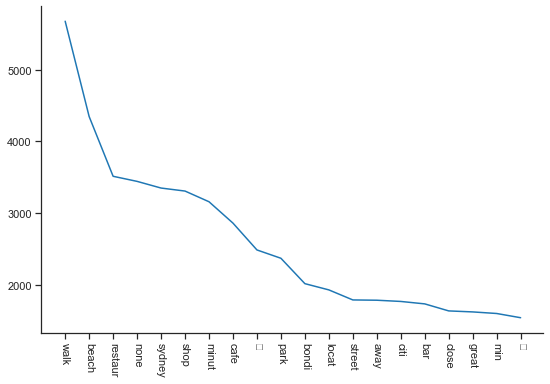

In [85]:
# A plot show frequency of unique tokens appear in 'notes'
fig, ax = plt.subplots()
y = pd.Series(dict(fdist.most_common()[:20]))
y = y.sort_values(ascending = False)

y.plot()

indexes = np.arange(0,len(y))
ax.set_xticks(indexes)
ax.set_xticklabels(y.index, rotation = '-90')
ax.set_xlim(-1)

plt.tight_layout

sns.despine()
plt.show()


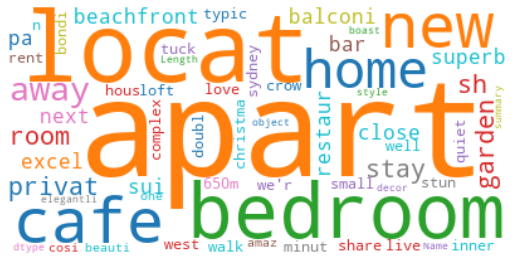

In [86]:
from wordcloud import WordCloud
fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(str(train1['summary']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

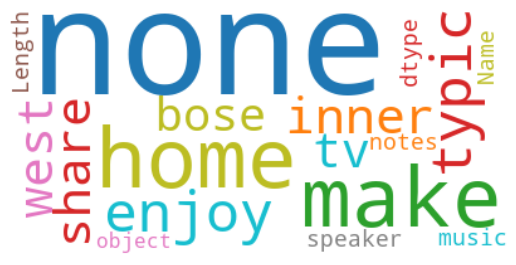

In [87]:
from wordcloud import WordCloud
fig, ax = plt.subplots()
wordcloud = WordCloud(background_color="white", colormap='tab10', max_words=200).generate(str(train1['notes']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [88]:
# drop text columns in the train1 dataframe since we used TFIDF
train1.drop(labels = ['name', 'summary', 'space', 'neighborhood_overview','notes', 'transit',
                     'access', 'interaction', 'house_rules'], axis = 1, inplace = True)


In [89]:
# drop text columns in the test1 dataframe
test1.drop(labels = ['name', 'summary', 'space', 'neighborhood_overview','notes', 'transit',
                     'access', 'interaction', 'house_rules'], axis = 1, inplace = True)

In [90]:
# drop useless text column 
train1.drop(labels = ['neighbourhood_cleansed','host_about'], axis = 1, inplace = True)

In [91]:
# drop useless text column 
test1.drop(labels = ['neighbourhood_cleansed','host_about'], axis = 1, inplace = True)

# EDA

In [92]:
train2 = train1.copy()
test2 = test1.copy()

In [93]:
price_correlations = train2.corr()['price'].abs().sort_values(ascending=False)
price_correlations.round(3)

price                                          1.00
bedrooms                                       0.60
bathrooms                                      0.58
accommodates                                   0.58
beds                                           0.53
room_type_Private room                         0.31
property_type_House                            0.30
latitude                                       0.20
guests_included                                0.18
longitude                                      0.17
host_listings_count                            0.17
host_total_listings_count                      0.17
cleaning_fee_perc                              0.17
calculated_host_listings_count_entire_homes    0.15
extra_people_perc                              0.14
calculated_host_listings_count                 0.14
calculated_host_listings_count_private_rooms   0.13
amenities                                      0.11
availability_365                               0.10
instant_book

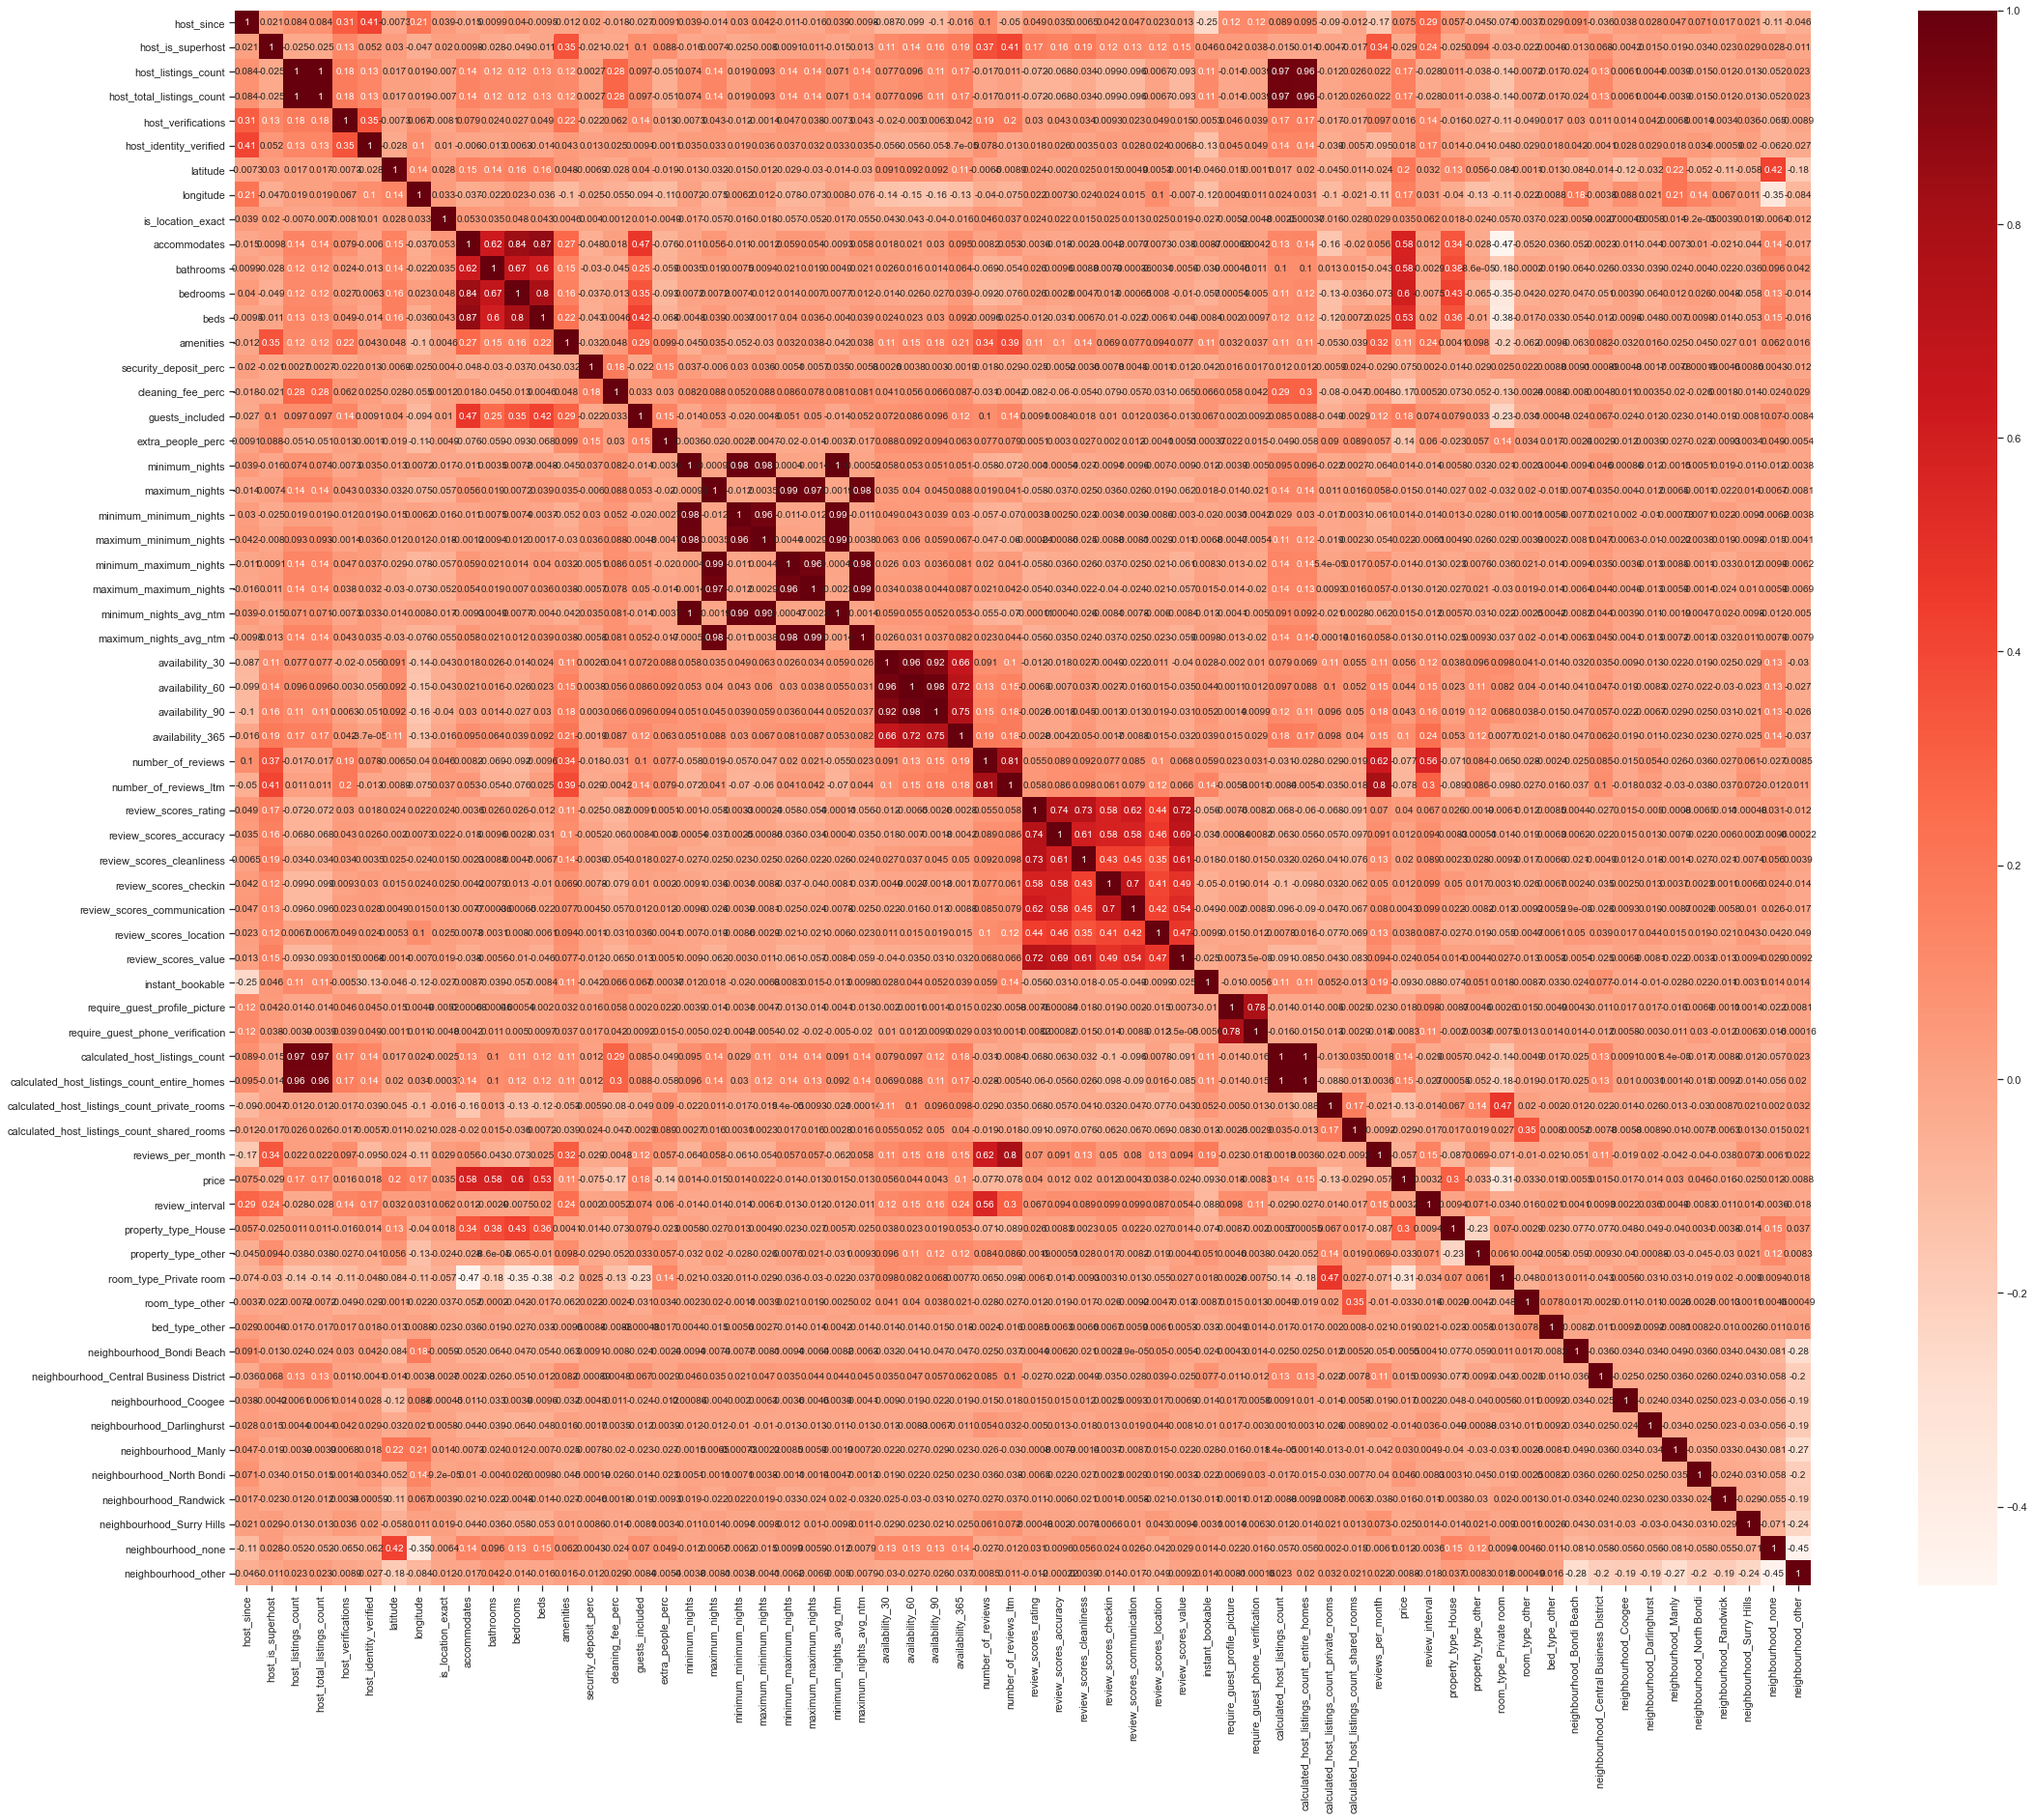

In [94]:
# heatmap to check multicollinearity (有时间可以重新调整下， 看不清)
train2_heatmap = train2.corr()
f, ax = plt.subplots(figsize=(40, 30))
sns.heatmap(train2_heatmap, square=True,annot= True, cmap='Reds')
plt.show()


In [95]:
numerical = ['security_deposit_perc','cleaning_fee_perc','review_scores_rating',
                      'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin'
                      ,'review_scores_communication','review_scores_location','review_scores_value',
                      'reviews_per_month','bathrooms','bedrooms','beds']
categorical= ['cancellation_policy','host_response_time']
boolean=['host_is_superhost','host_identity_verified','is_location_exact','instant_bookable'
                 ,'require_guest_profile_picture','require_guest_phone_verification']

### Boxplot

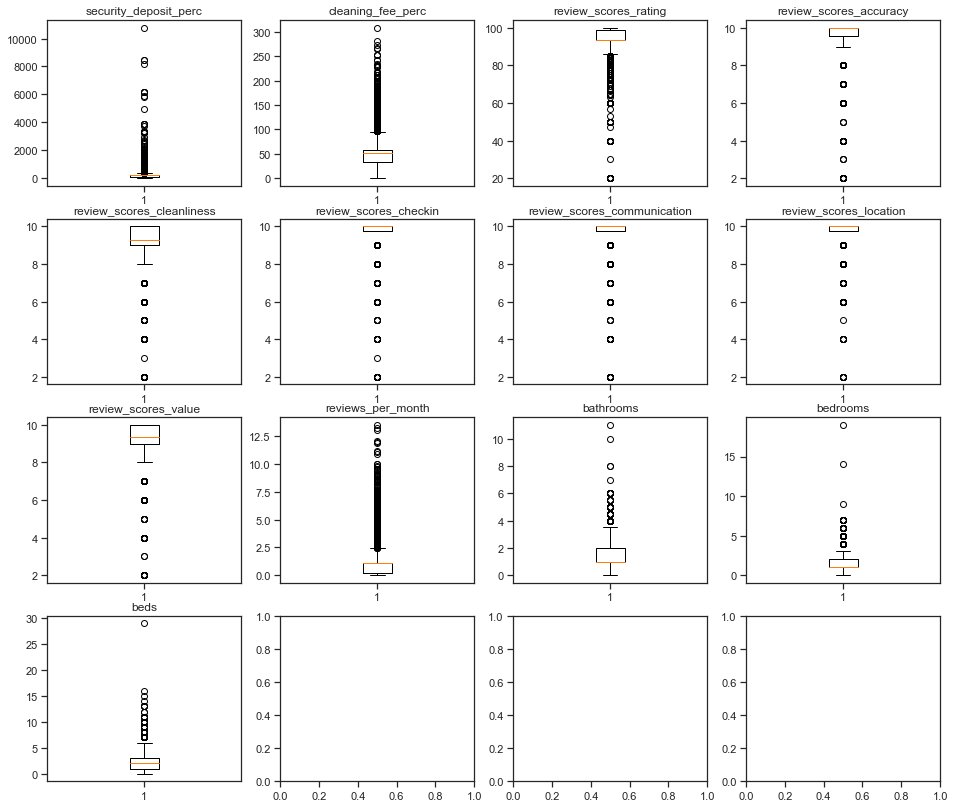

In [96]:
# use box plot to identify outliers
%matplotlib inline
import matplotlib.pyplot as plt
fig,ax=plt.subplots(4,4,figsize=(16,14))
ax=ax.reshape(-1)
for (i,name)in enumerate(numerical):
    ax[i].boxplot(train2[name])
    ax[i].set_title(name)
plt.show()

###  Delete Outliers

In [97]:
# Delete outliers according to the Boxplot

train2 = train2[-(train2['reviews_per_month']>13)|(train2['review_scores_rating']<30)|(train2['security_deposit_perc']>6000)|
                    (train2['cleaning_fee_perc']>260)|(train2['bedrooms']>10)|(train2['beds']>20)|(train2['bathrooms']>8)]


In [98]:
train2.shape

(9835, 67)

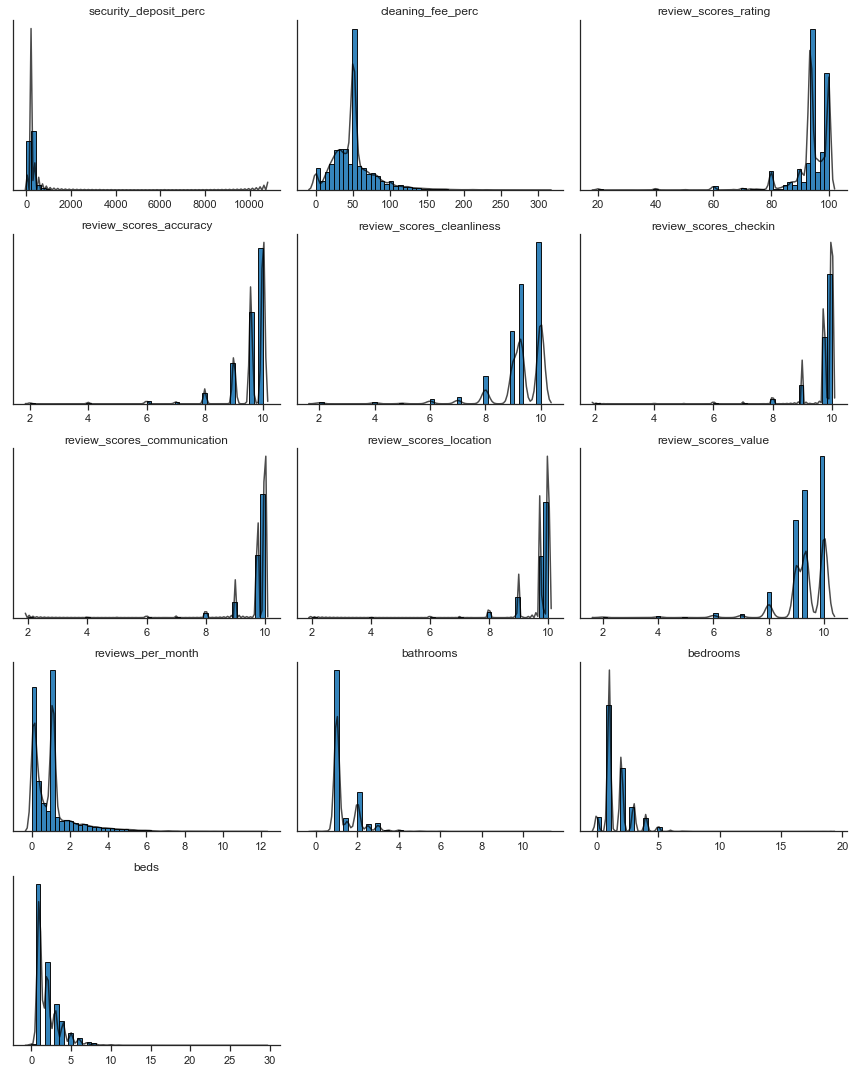

In [99]:
from statlearning import plot_dists
plot_dists(train2[numerical])
plt.show()

###### Since the histogram above shows that the variable "security_deposit_perc", "bathrooms", "bedrooms",..., are right skewed. I decide to do the Log Transformation to make the distributions as possible to reach Normal Distribution 

In [100]:
# Double check the skewness using skew()
train2.skew().sort_values(ascending = True).head()

review_scores_communication   -6.26
review_scores_checkin         -6.14
review_scores_location        -4.89
review_scores_accuracy        -4.76
review_scores_rating          -4.06
dtype: float64

In [101]:
#  Log transformation to right skewed data (when skewness > 3, exclude 'price')
right_skewed = ['neighbourhood_Bondi Beach', 'neighbourhood_Manly', 'number_of_reviews','neighbourhood_Surry Hills', 
'calculated_host_listings_count',
'calculated_host_listings_count_entire_homes', 'host_listings_count',
'host_total_listings_count', 'neighbourhood_Central Business District',
'neighbourhood_North Bondi','calculated_host_listings_count_private_rooms',
'extra_people_perc','neighbourhood_Darlinghurst', 'neighbourhood_Coogee',
'neighbourhood_Randwick', 'require_guest_phone_verification',
'room_type_other', 'security_deposit_perc','require_guest_profile_picture','bed_type_other',
'calculated_host_listings_count_shared_rooms']

In [102]:
# Log transformation to skewed variables
# 'price' is not logged 
train2[right_skewed] = np.log1p(train2[right_skewed])
test2[right_skewed] = np.log1p(test2[right_skewed])

train2_log = train2.copy()
test2_log = test2.copy()

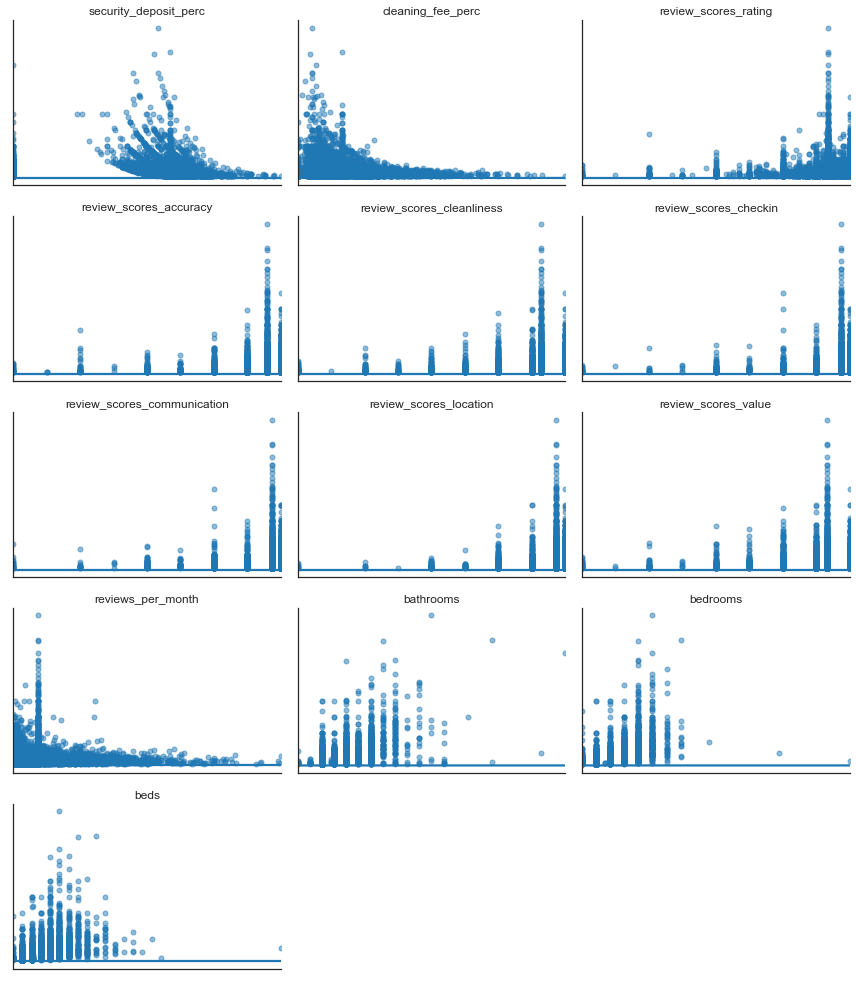

In [103]:
from statlearning import plot_logistic_regressions
fig, ax = plot_logistic_regressions(train2[numerical], train2['price'])
plt.show()

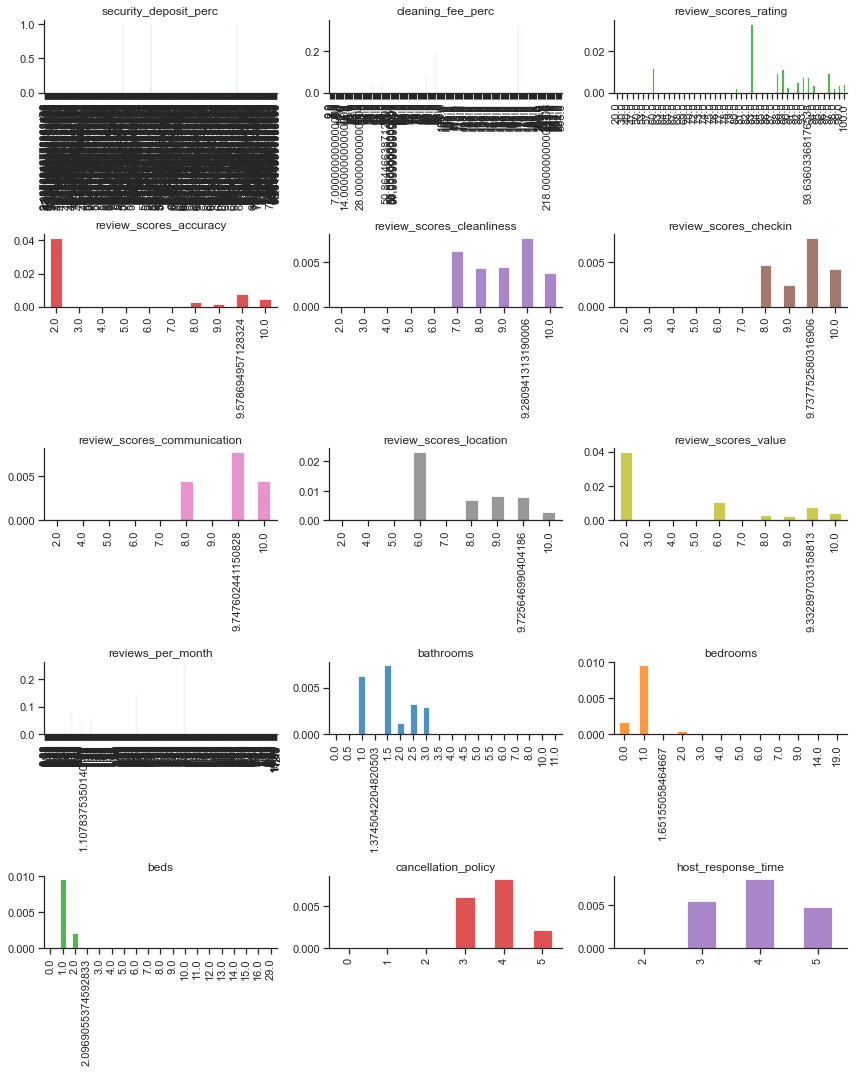

In [104]:
from statlearning import crosstabplots
crosstabplots(train2[numerical+categorical], train2['price'])
plt.show()

# Build Model 

In [105]:
# Merge dataframe to build model 
train_merge = pd.concat([train2_log, train1_tfidf_PCA], axis = 1, verify_integrity = True)
# since outliers has been deleted in train2, therefore the merged df contains NaN values
train_merge= train_merge.dropna(axis = 0, how = 'any')

In [106]:
# Test Set
test_merge = pd.concat([test2_log, test1_tfidf_PCA], axis = 1, verify_integrity = True)

In [107]:
response = 'price'
predictors = [variable for variable in train_merge if variable!=response] 

In [108]:
x_train = train_merge.loc[:, predictors]
x_test = test_merge.loc[:, predictors]

y_train = train_merge.loc[:, response]

In [109]:
# Min - Max transformation to X_train, X_test data only
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Ridge Regression

In [110]:
from sklearn.linear_model import RidgeCV

alphas = list(np.logspace(-15, 15, 151, base=2))
ridge = RidgeCV(alphas=alphas)
ridge.fit(x_train, y_train)

RidgeCV(alphas=array([3.05175781e-05, 3.50554918e-05, 4.02681858e-05, 4.62559987e-05,
       5.31341897e-05, 6.10351562e-05, 7.01109836e-05, 8.05363715e-05,
       9.25119975e-05, 1.06268379e-04, 1.22070312e-04, 1.40221967e-04,
       1.61072743e-04, 1.85023995e-04, 2.12536759e-04, 2.44140625e-04,
       2.80443934e-04, 3.22145486e-04, 3.70047990e-04, 4.25073517e-04,
       4.88281250e-04, 5.60887869e-0...
       8.91443777e+02, 1.02400000e+03, 1.17626712e+03, 1.35117610e+03,
       1.55209376e+03, 1.78288755e+03, 2.04800000e+03, 2.35253423e+03,
       2.70235220e+03, 3.10418753e+03, 3.56577511e+03, 4.09600000e+03,
       4.70506846e+03, 5.40470440e+03, 6.20837506e+03, 7.13155021e+03,
       8.19200000e+03, 9.41013692e+03, 1.08094088e+04, 1.24167501e+04,
       1.42631004e+04, 1.63840000e+04, 1.88202738e+04, 2.16188176e+04,
       2.48335002e+04, 2.85262009e+04, 3.27680000e+04]))

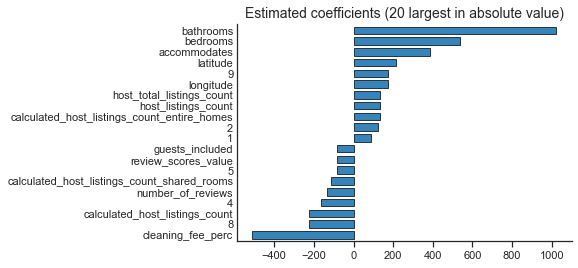

In [111]:
from statlearning import plot_coefficients
plot_coefficients(ridge, predictors)
plt.show()

In [112]:
# Predict y-test
y_pred= ridge.predict(x_test)
y_pred

array([ 23.98077522, -99.62199365, -92.09889898, ..., 129.78112041,
       195.48451895,   1.01046845])

### Lasso Regression

In [113]:
from sklearn.linear_model import LassoCV

lasso = LassoCV(cv=5)
lasso.fit(x_train, y_train)

LassoCV(cv=5)

In [114]:
len(predictors)-np.sum(lasso.coef_==0.0)

62

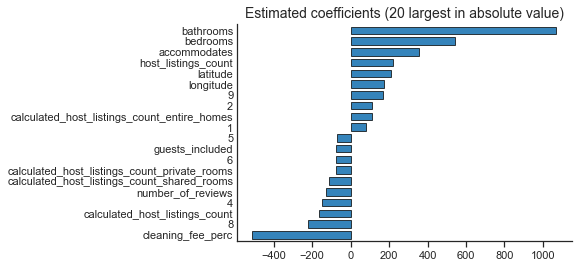

In [115]:
plot_coefficients(lasso,predictors)
plt.show()

In [116]:
# Predict y-test
y_pred= lasso.predict(x_test)
y_pred


array([ 29.00476873, -93.05147271, -94.08756766, ..., 123.27237828,
       197.70389094,   0.28927066])

### Elastic Net

In [117]:
from sklearn.linear_model import ElasticNetCV
enet = ElasticNetCV(l1_ratio=[0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 0.99], cv=5)
enet.fit(x_train, y_train)

ElasticNetCV(cv=5,
             l1_ratio=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99])

In [118]:
enet.l1_ratio_

0.99

In [119]:
len(predictors)-np.sum(enet.coef_==0.0)

65

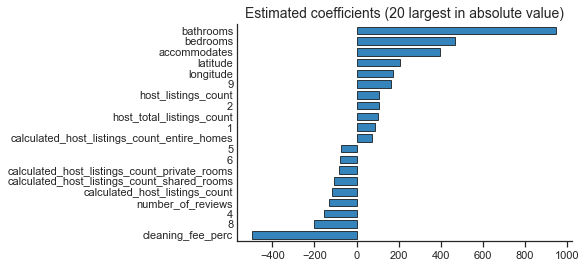

In [120]:
plot_coefficients(enet, predictors)
plt.show()

In [121]:
# Predict y-test
y_pred= enet.predict(x_test)
y_pred

array([ 43.99025028, -83.44473729, -76.34410139, ..., 146.17642994,
       209.42391063,  15.01456022])

### Gradient Boosting

In [122]:
# Gradient Boosting Regressor with RandomizedSearch CV for best parameters

from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

tuning_parameters = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators' : [250, 500, 750, 1000, 1500, 2000],
    'max_depth' : [2 ,3, 4],
    'subsample' : [0.6, 0.8, 1.0]
}

# Using GridSearchCV would be too slow. Increase the number of iterations to explore more 
# hyperparameter combinations.
gb = RandomizedSearchCV(model, tuning_parameters, n_iter = 16, cv = 5, n_jobs=4, random_state=87)
gb.fit(x_train, y_train)

print('Best parameters found by randomised search:', gb.best_params_, '\n')
gb.best_estimator_

Best parameters found by randomised search: {'subsample': 0.8, 'n_estimators': 750, 'max_depth': 3, 'learning_rate': 0.1} 



GradientBoostingRegressor(n_estimators=750, subsample=0.8)

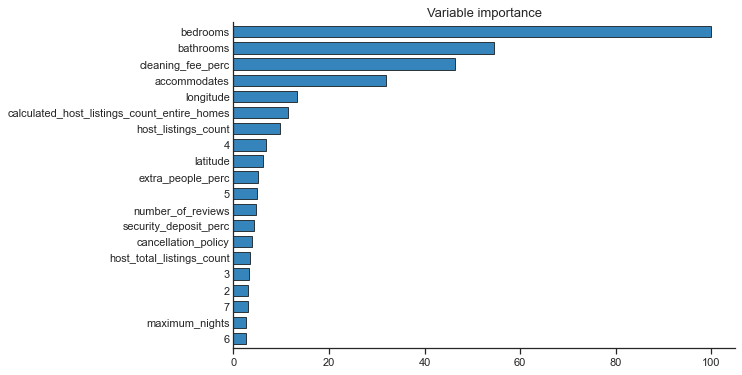

In [123]:
from statlearning import plot_feature_importance
plot_feature_importance(gb.best_estimator_, predictors)
plt.show()

In [124]:
y_pred = gb.best_estimator_.predict(x_test)
y_pred

array([315.40123038, 142.75720357, 217.81745366, ..., 237.95007396,
       215.62531272, 180.66571825])

### Random Forest

In [125]:
from sklearn.ensemble import  RandomForestClassifier
rf = RandomForestClassifier(criterion='entropy', max_features= 2, min_samples_leaf=5, 
                            n_estimators=1000, random_state=1)
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_features=2, min_samples_leaf=5,
                       n_estimators=1000, random_state=1)

In [ ]:
model = RandomForestClassifier(criterion='entropy', n_estimators = 1000)

tuning_parameters = {
    'min_samples_leaf': [1],
    'max_features': np.arange(1, x_train.shape[1]),
}

rf_search = RandomizedSearchCV(model, tuning_parameters, n_iter= 32, cv = 5, n_jobs = -1, scoring = 'neg_log_loss', 
                               random_state=1)
rf_search.fit(x_train, y_train)

print('Best parameters found by randomised search:', rf_search.best_params_, '\n')
rf = rf_search.best_estimator_

In [ ]:
rf.n_estimators = 10000
rf.fit(x_train, y_train)

In [ ]:
y_pred = rf.predict(x_test)

In [ ]:
from statlearning import plot_feature_importance
plot_feature_importance(rf, predictors)
plt.show()

# Model Evaluation

In [ ]:
# Initialise table
columns=['RMSE', 'Log RMSE', 'MAE']
rows=['Ridge', 'Lasso', 'Elastic Net', 'Gradient Boosting', 'Random Forest']
results = pd.DataFrame(0.0, columns=columns, index=rows)
methods = [Ridge, Lasso, Elastic Net, Gradient Boosting, Random Forest]

# Compute test predictions and metrics
for i, method in enumerate(methods):
    y_fitted = method.predict(x_train)   
    
    results.iloc[i,0] = np.sqrt(mean_squared_error(y_train, y_fitted))
    results.iloc[i,1] = np.log(results.iloc[i,0])
    results.iloc[i,3] = mean_absolute_error(np.exp(y_train), y_fitted)

results = results.round(2)
results

In [ ]:
submission = pd.DataFrame(np.c_[x_test.index, y_pred)], columns=['id', 'price'])
submission['Id'] = submission['Id'].astype(int)
submission['price'] =submission['price'].astype(int)
submission.to_csv('kaggle_submission_Ridge.csv', index=False)
submission.head()